* Linearity: assumes that the relationship between predictors and target variables is linear
* No noise: eg that there are no outliers
* No collinearity: if you have highly correlated predictors, it's most likely your model will overfit
* Normal distribution: more reliable predictions are made if the predictors and the targetvariable are notmally distributed
* Scale: It's a distance-based algorithm, so preditors should be scaled-like with standard scaler

In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('abalone.csv')
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [4]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1256,I,0.425,0.31,0.090,0.3010,0.1385,0.065,0.0800,7
2180,F,0.625,0.42,0.165,1.0595,0.3580,0.165,0.4450,21
3488,I,0.520,0.38,0.130,0.5345,0.2375,0.122,0.1535,8


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df=pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.shape

(4177, 9)

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

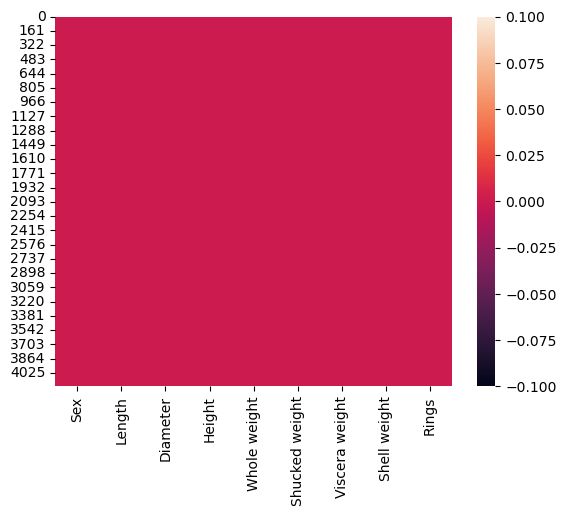

In [9]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

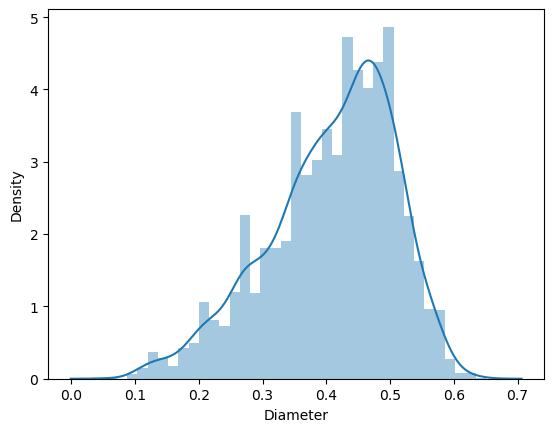

In [10]:
sns.distplot(df['Diameter'])

In [11]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
lencode = LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
df.iloc[:,0]

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

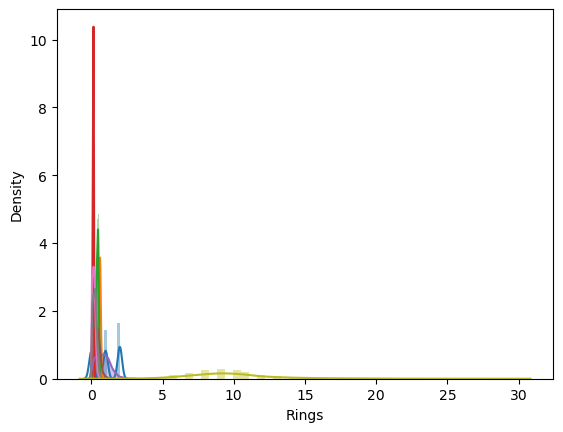

In [14]:
for i in df.columns:
    sns.distplot(df[i])

<AxesSubplot:xlabel='Height', ylabel='Density'>

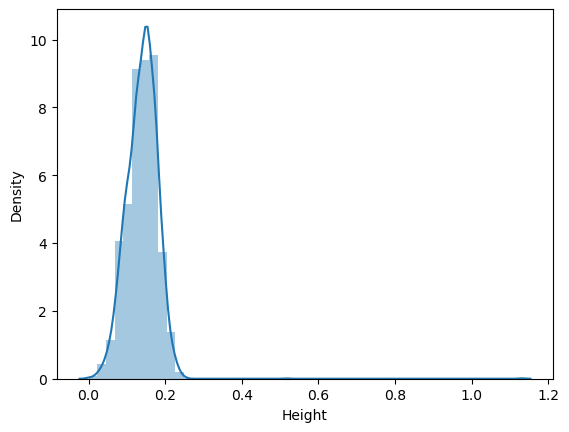

In [15]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

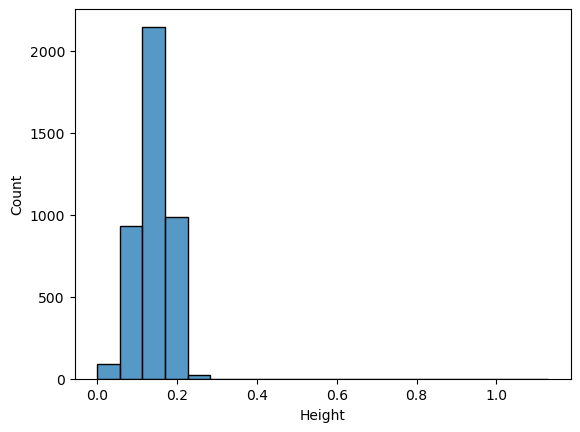

In [16]:
sns.histplot(df['Height'], bins=20)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

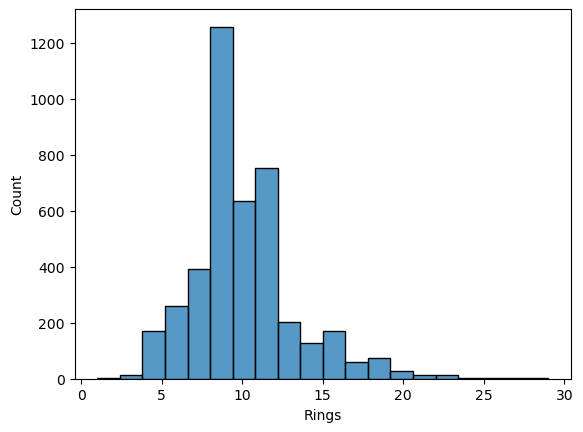

In [17]:
sns.histplot(df['Rings'], bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

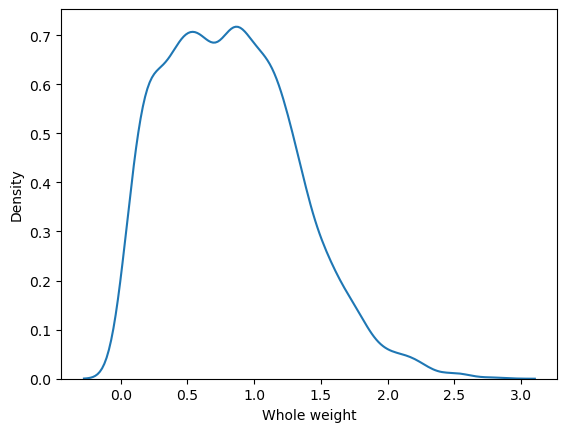

In [18]:
sns.kdeplot(df['Whole weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

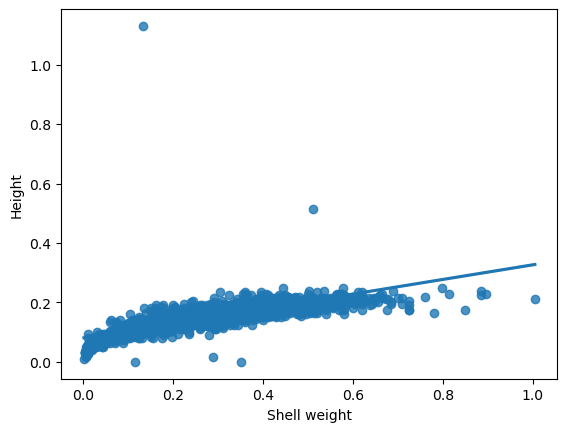

In [19]:
sns.regplot(x='Shell weight', y ='Height', data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

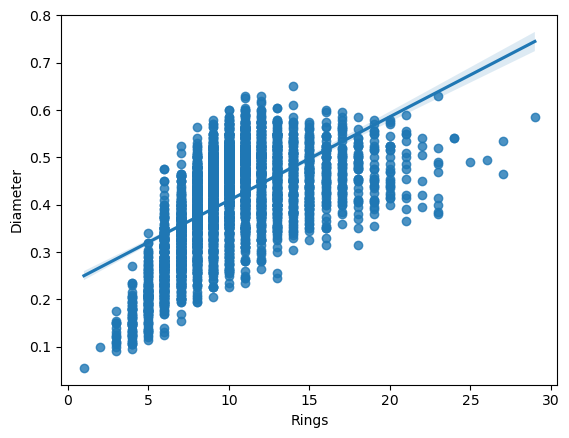

In [20]:
sns.regplot(x='Rings', y='Diameter', data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

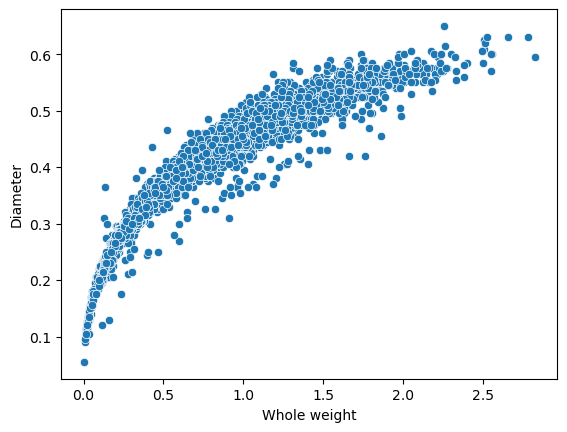

In [21]:
sns.scatterplot(x='Whole weight', y='Diameter', data=df)

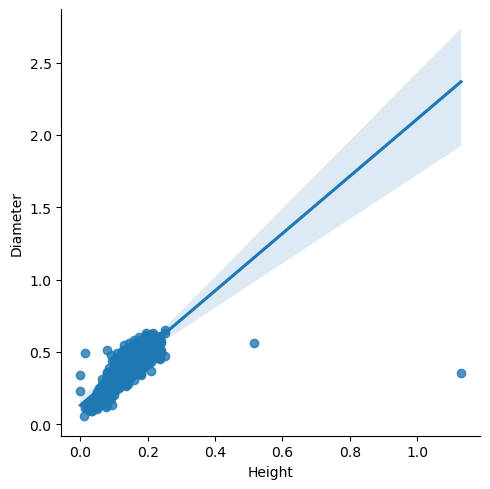

In [22]:
sns.lmplot(x='Height', y='Diameter', data=df)

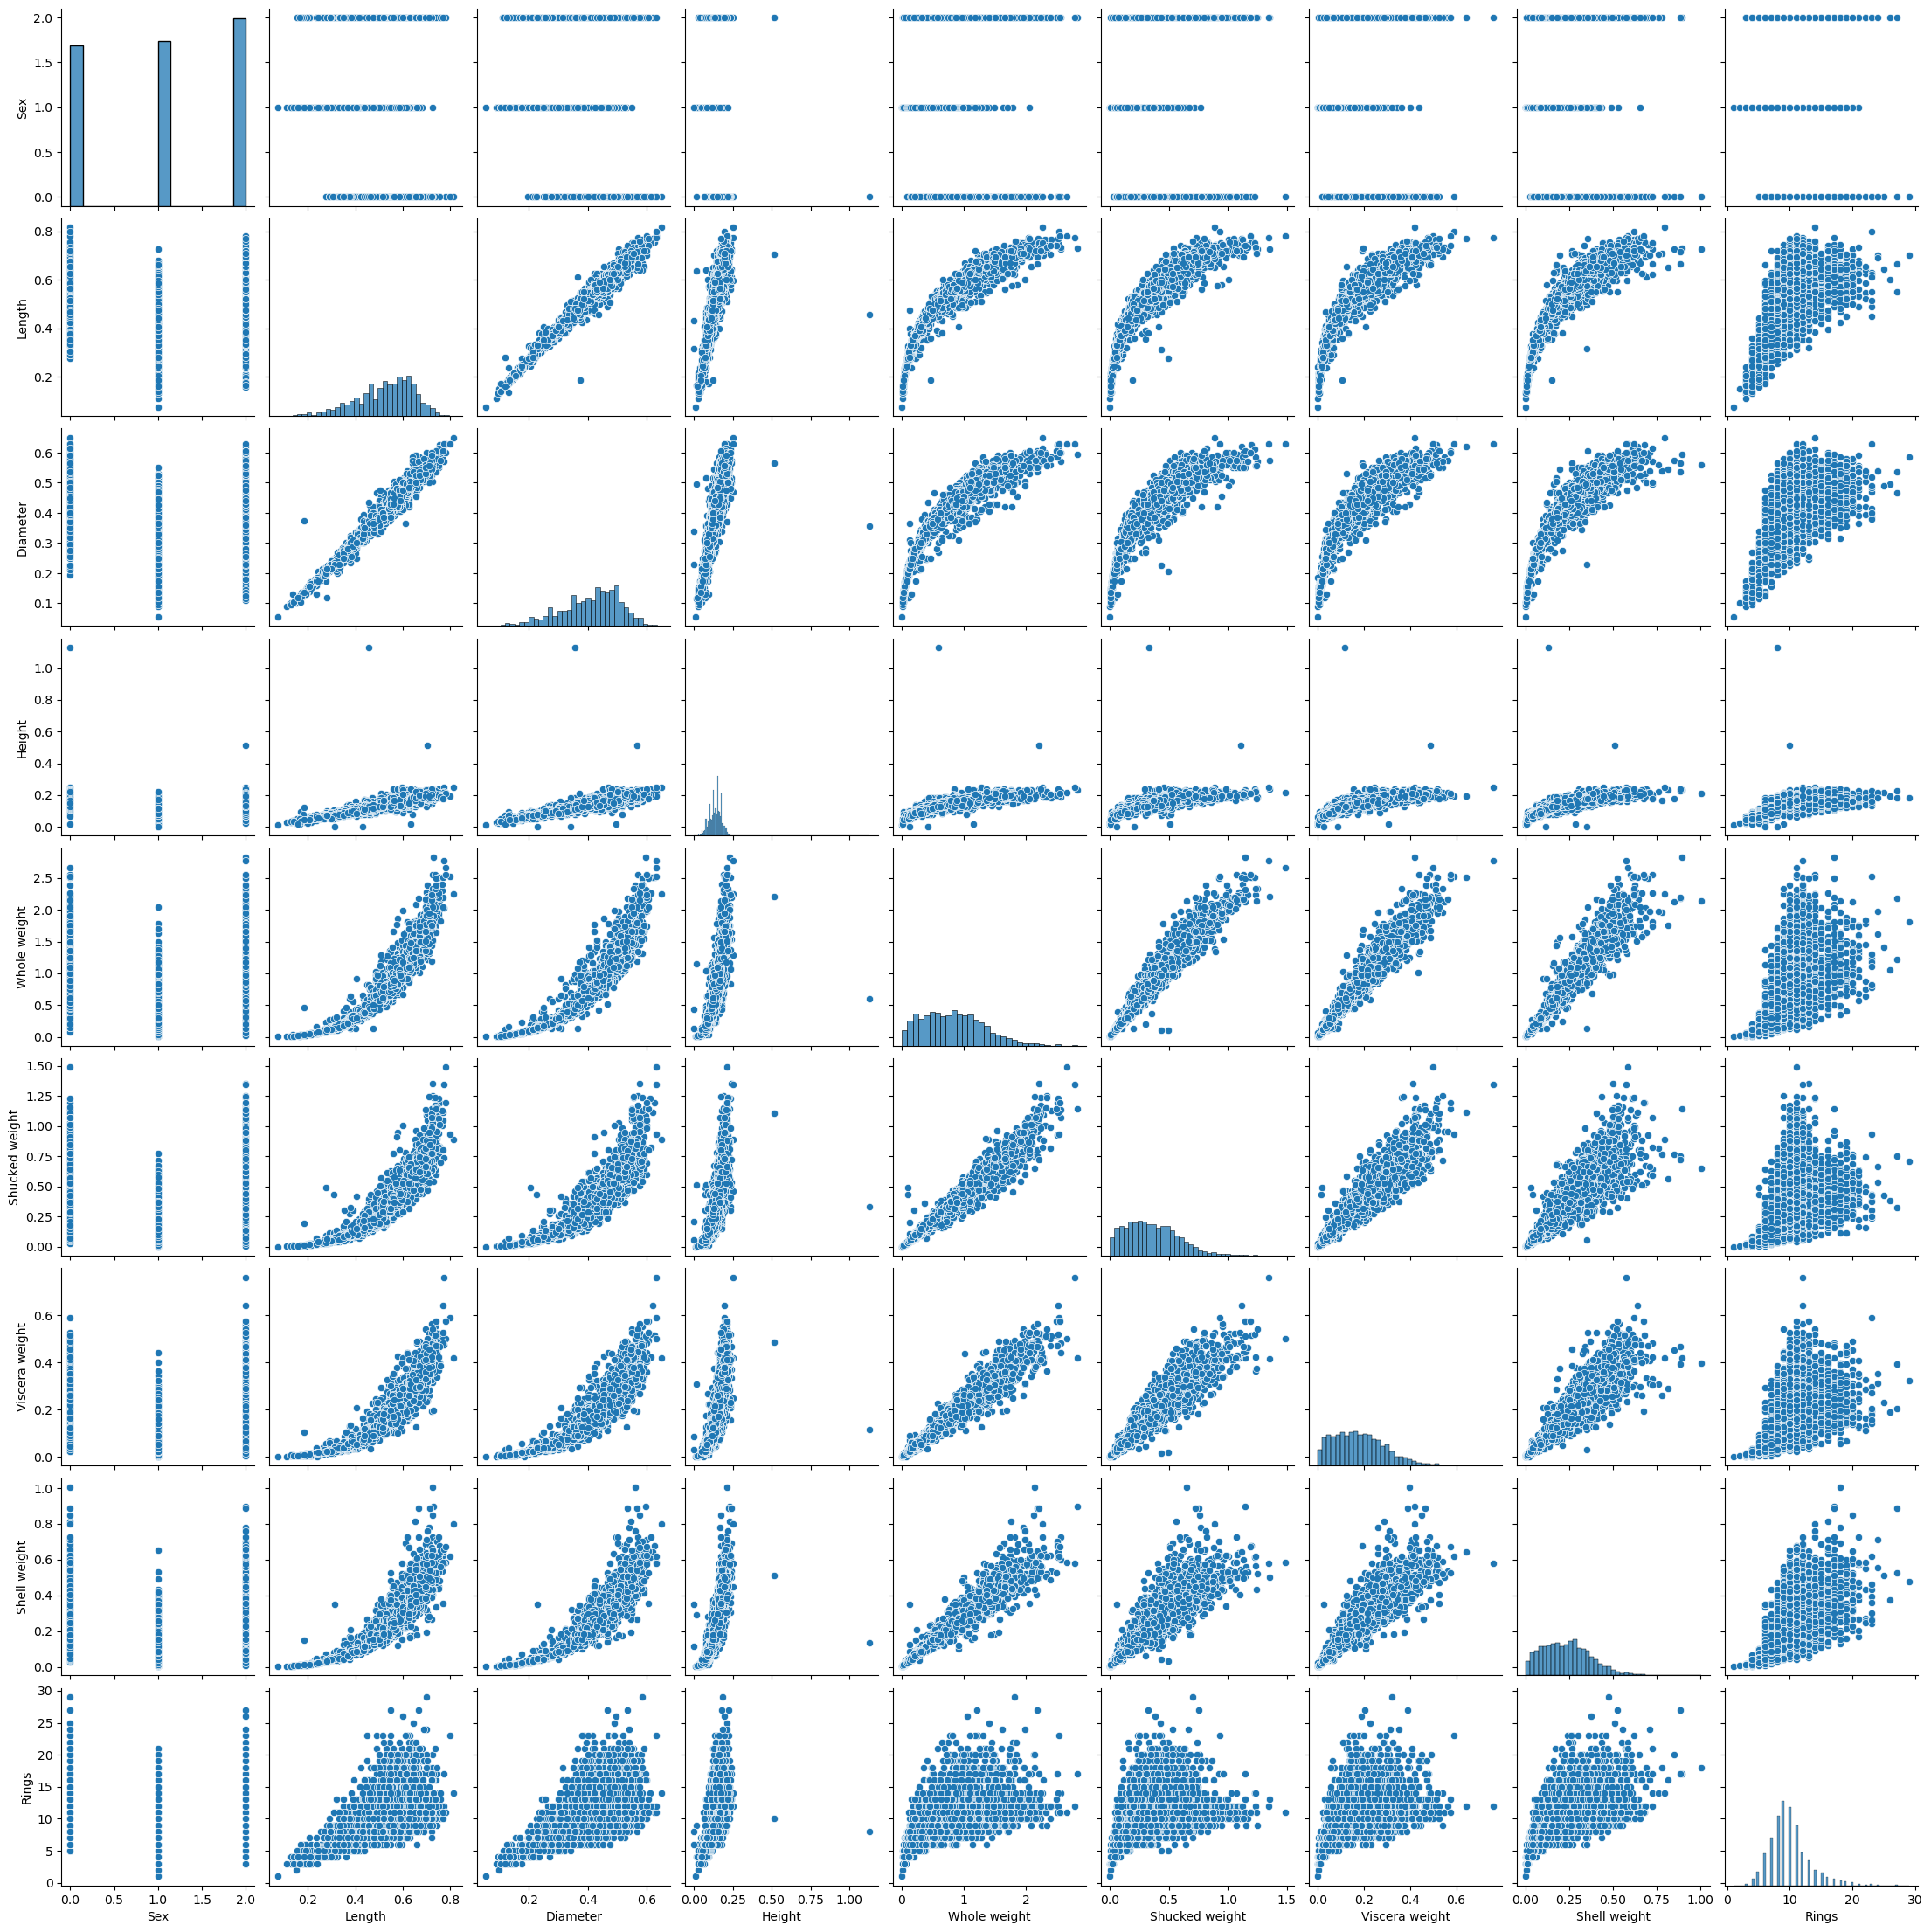

In [23]:
sns.pairplot(df)

In [24]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**Observations:**
* Mean of height column is greater than median, hence it is right skewed. Similarly with whole weight/shucked weight. Standard deviation is high in whole weight, shucked weight. It means data spread is very high.
* High gap between 75th percentile and max is present in rings. So few outliers is present.

In [25]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [26]:
df['Height'] =np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

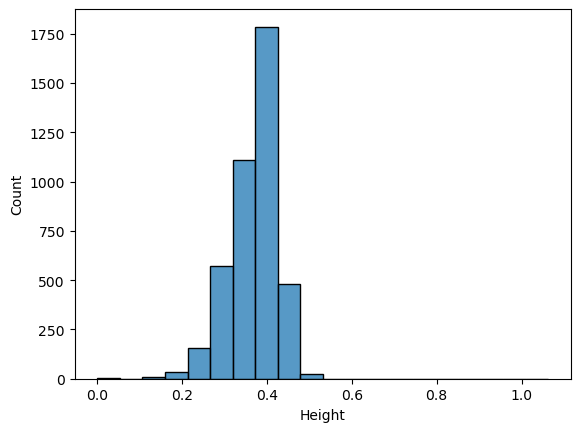

In [27]:
sns.histplot(df['Height'],bins=20)

In [28]:
#detecting Outliers

from scipy.stats import zscore

dfzscore = np.abs(zscore(df))

print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [29]:
dfnew = df[(dfzscore<3).all(axis=1)]
print('dfnew.shape =',dfnew.shape)

df= dfnew

dfnew.shape = (4019, 9)


In [30]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<AxesSubplot:>

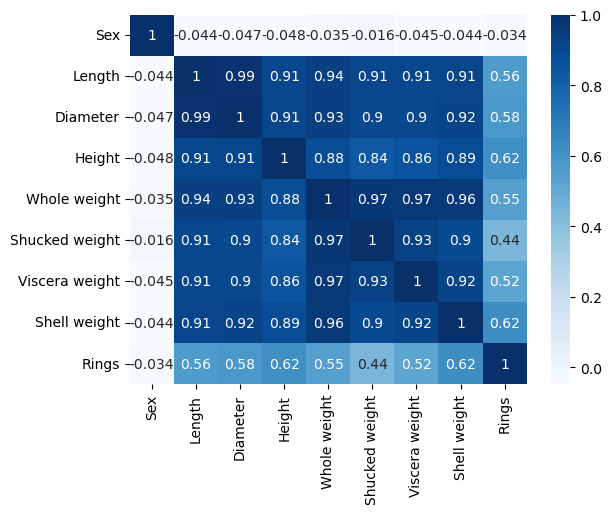

In [31]:
sns.heatmap(df.corr(),cmap="Blues", annot =True)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
x = df.iloc[:,:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [35]:
x.shape

(4019, 8)

In [36]:
x.shape[1]

8

In [37]:
y = df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [40]:
def vif_cal():
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
    vif['feature'] =x.columns
    return(vif)

In [41]:
vif_cal()

,VIF Factor,feature
0,2.632493,Sex
1,802.340579,Length
2,763.963727,Diameter
3,154.948351,Height
4,441.891678,Whole weight
5,110.275122,Shucked weight
6,65.499021,Viscera weight
7,92.744708,Shell weight


**Data Cleansing**

Feature engineering - selection of feature/Variables/columns

Detect outliers / remove

In [43]:
df.drop(['Shucked weight', 'Length'], axis = 1, inplace = True)

In [44]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [45]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [46]:
vif_cal()

,VIF Factor,feature
0,2.623184,Sex
1,207.507326,Diameter
2,131.432133,Height
3,140.572357,Whole weight
4,60.762342,Viscera weight
5,58.911776,Shell weight


<AxesSubplot:>

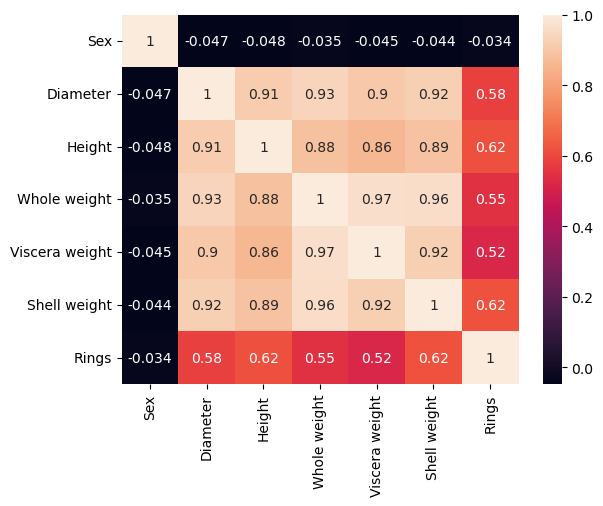

In [47]:
sns.heatmap(df.corr(), annot = True)

In [48]:
x = df.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [49]:
x.shape

(4019, 6)

In [50]:
y.shape

(4019,)

In [51]:
st =StandardScaler()
x =st.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

In [52]:
x.shape

(4019, 6)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=55)

In [56]:
lg=LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

In [57]:
predlg =lg.predict(x_test)
predlg

array([12.11331063, 11.61504384,  9.61650377, ..., 10.38679789,
        9.70195901, 10.88035602])

In [59]:
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

NameError: name 'accuracy_score' is not defined